In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)
set1 = np.random.uniform(low=0, high=10, size=50)
set2 = np.random.uniform(low=0, high=10, size=50)

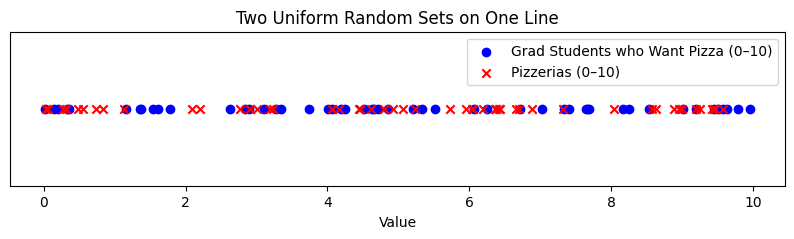

In [ ]:
plt.figure(figsize=(10, 2))
plt.scatter(set1, np.zeros_like(set1), color="blue", marker="o", label="Grad Students who Want Pizza (0–10)")
plt.scatter(set2, np.zeros_like(set2), color="red", marker="x", label="Pizzerias (0–10)")

plt.yticks([])  # hide y-axis
plt.xlabel("Value")
plt.title("Two Uniform Random Sets on One Line")
plt.legend()
plt.show()

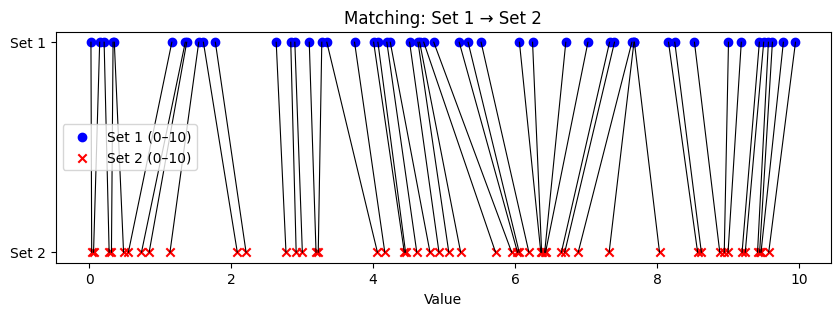

In [ ]:
# Plot
plt.figure(figsize=(10, 3))

# Plot Set 1 (blue) at y=1
plt.scatter(set1, np.ones_like(set1), color="blue", marker="o", label="Set 1 (0–10)")

# Plot Set 2 (red) at y=0
plt.scatter(set2, np.zeros_like(set2), color="red", marker="x", label="Set 2 (0–10)")

set1_sorted = np.sort(set1)
set2_sorted = np.sort(set2)

for x1, x2 in zip(set1_sorted, set2_sorted):
    plt.plot([x1, x2], [1, 0], color="black", linewidth=0.8)

# Styling
plt.yticks([0, 1], ["Set 2", "Set 1"])
plt.xlabel("Value")
plt.title("Matching: Set 1 → Set 2")
plt.legend()
plt.show()

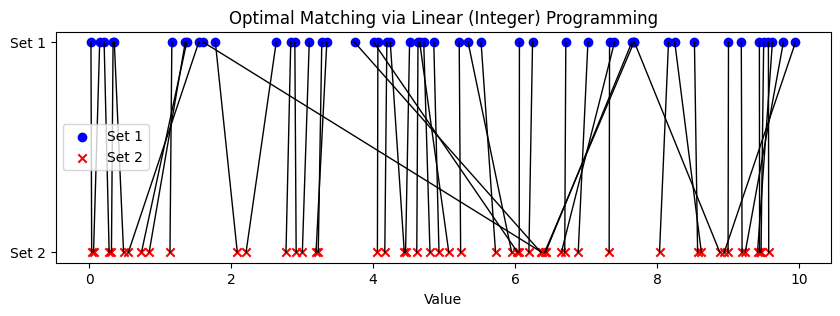

Total matching cost: 48.88259829130452


In [ ]:
# Integer programming optimal solution for cost
from scipy.optimize import linear_sum_assignment
# Cost function changable here
# cost_matrix = np.log(np.abs(set1[:, None] - set2[None, :]))
p = 0.01
cost_matrix = np.abs(set1[:, None] - set2[None, :])** p

# Solve assignment problem
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Plot the result
plt.figure(figsize=(10, 3))
plt.scatter(set1, np.ones_like(set1), color="blue", label="Set 1", marker="o")
plt.scatter(set2, np.zeros_like(set2), color="red", label="Set 2", marker="x")

# Draw optimal matches
for i, j in zip(row_ind, col_ind):
    plt.plot([set1[i], set2[j]], [1, 0], color="black", linewidth=1)

plt.yticks([0, 1], ["Set 2", "Set 1"])
plt.xlabel("Value")
plt.title("Optimal Matching via Linear (Integer) Programming")
plt.legend()
plt.show()

# Print total cost
total_cost = cost_matrix[row_ind, col_ind].sum()
print("Total matching cost:", total_cost)

/tmp/ipython-input-3994653741.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


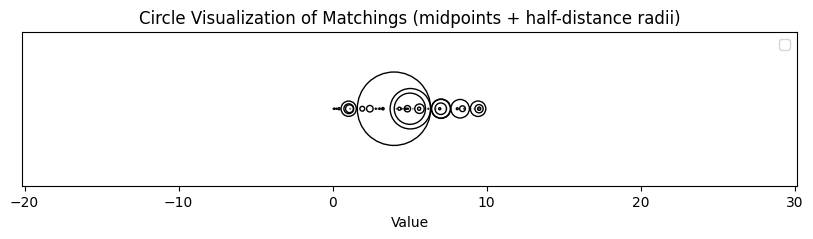

In [ ]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(figsize=(10, 2))

for i, j in zip(row_ind, col_ind):
    # midpoint between matched points
    midpoint = (set1[i] + set2[j]) / 2
    # half the distance between them
    radius = abs(set1[i] - set2[j]) / 2

    circ = Circle((midpoint, 0), radius, fill=False, color="black", lw=1)
    ax.add_patch(circ)

# plot Set 1 and Set 2 for reference
# ax.scatter(set1, np.zeros_like(set1), color="blue", label="Set 1")
# ax.scatter(set2, np.zeros_like(set2), color="red", marker="x", label="Set 2")

ax.set_aspect("equal", adjustable="datalim")
ax.set_ylim(-5, 5)
ax.set_xlim(0, 10)
ax.set_yticks([])
ax.set_xlabel("Value")
ax.set_title("Circle Visualization of Matchings (midpoints + half-distance radii)")
ax.legend()
plt.show()